### Smartphone-Based Recognition of Human Activities and Postural Transitions

#### Léa Romano

Enoncé du projet :  
Les expériences ont été réalisées avec un groupe de 30 volontaires dans une tranche d'âge de 19 à 48 ans. Ils ont effectué un protocole d'activités composé de six activités de base: trois postures statiques (debout, assis, couché) et trois activités dynamiques (marcher, descendre et monter les escaliers). L'expérience a également inclus des transitions posturales qui se sont produites entre les postures statiques. Ce sont: debout-assis, assis-debout, assis-couché, couché-assis, debout-couché et couché-debout. Tous les participants portaient un smartphone (Samsung Galaxy S II) à la taille pendant l'exécution de l'expérience. Nous avons capturé l'accélération linéaire 3 axes et la vitesse angulaire 3 axes à un taux constant de 50 Hz en utilisant l'accéléromètre et le gyroscope intégrés de l'appareil. Les expériences ont été enregistrées sur vidéo pour étiqueter les données manuellement. L'ensemble de données obtenu a été divisé au hasard en deux ensembles, où 70% des volontaires ont été sélectionnés pour générer les données de formation et 30% les données de test.


Le but est ainsi de prédire l'activité des volontaires sachant : 

##### Signification des labels : 

1 WALKING  
2 WALKING_UPSTAIRS  
3 WALKING_DOWNSTAIRS  
4 SITTING  
5 STANDING  
6 LAYING  
7 STAND_TO_SIT  
8 SIT_TO_STAND  
9 SIT_TO_LIE  
10 LIE_TO_SIT  
11 STAND_TO_LIE  
12 LIE_TO_STAND  

### Importation des libraries

In [2]:
## Importation des librairies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
import xgboost as xgb

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection


### Création du dataset

In [4]:
#Import des données
XTrain = pd.read_csv('Train/X_train.txt', sep=" ", header=None)
XTest = pd.read_csv('Test/X_test.txt', sep=" ", header=None)
YTrain = pd.read_csv('Train/Y_train.txt', sep=" ", header=None)
YTest = pd.read_csv('Test/Y_test.txt', sep=" ", header=None)
#On crée les frames pour les X et Y puis on les concatène pour donner la dataframe finale
X_frames = [XTrain,XTest]
Y_frames = [YTrain,YTest]
df = pd.concat(X_frames)
labels = pd.concat(Y_frames)
labels.columns = ['labels']

features_names=["tBodyAcc-Mean-1","tBodyAcc-Mean-2","tBodyAcc-Mean-3","tBodyAcc-STD-1","tBodyAcc-STD-2","tBodyAcc-STD-3","tBodyAcc-Mad-1","tBodyAcc-Mad-2","tBodyAcc-Mad-3","tBodyAcc-Max-1","tBodyAcc-Max-2","tBodyAcc-Max-3","tBodyAcc-Min-1","tBodyAcc-Min-2","tBodyAcc-Min-3","tBodyAcc-SMA-1","tBodyAcc-Energy-1","tBodyAcc-Energy-2","tBodyAcc-Energy-3","tBodyAcc-IQR-1","tBodyAcc-IQR-2","tBodyAcc-IQR-3","tBodyAcc-ropy-1","tBodyAcc-ropy-1","tBodyAcc-ropy-1","tBodyAcc-ARCoeff-1","tBodyAcc-ARCoeff-2","tBodyAcc-ARCoeff-3","tBodyAcc-ARCoeff-4","tBodyAcc-ARCoeff-5","tBodyAcc-ARCoeff-6","tBodyAcc-ARCoeff-7","tBodyAcc-ARCoeff-8","tBodyAcc-ARCoeff-9","tBodyAcc-ARCoeff-10","tBodyAcc-ARCoeff-11","tBodyAcc-ARCoeff-12","tBodyAcc-Correlation-1","tBodyAcc-Correlation-2","tBodyAcc-Correlation-3","tGravityAcc-Mean-1","tGravityAcc-Mean-2","tGravityAcc-Mean-3","tGravityAcc-STD-1","tGravityAcc-STD-2","tGravityAcc-STD-3","tGravityAcc-Mad-1","tGravityAcc-Mad-2","tGravityAcc-Mad-3","tGravityAcc-Max-1","tGravityAcc-Max-2","tGravityAcc-Max-3","tGravityAcc-Min-1","tGravityAcc-Min-2","tGravityAcc-Min-3","tGravityAcc-SMA-1","tGravityAcc-Energy-1","tGravityAcc-Energy-2","tGravityAcc-Energy-3","tGravityAcc-IQR-1","tGravityAcc-IQR-2","tGravityAcc-IQR-3","tGravityAcc-ropy-1","tGravityAcc-ropy-1","tGravityAcc-ropy-1","tGravityAcc-ARCoeff-1","tGravityAcc-ARCoeff-2","tGravityAcc-ARCoeff-3","tGravityAcc-ARCoeff-4","tGravityAcc-ARCoeff-5","tGravityAcc-ARCoeff-6","tGravityAcc-ARCoeff-7","tGravityAcc-ARCoeff-8","tGravityAcc-ARCoeff-9","tGravityAcc-ARCoeff-10","tGravityAcc-ARCoeff-11","tGravityAcc-ARCoeff-12","tGravityAcc-Correlation-1","tGravityAcc-Correlation-2","tGravityAcc-Correlation-3","tBodyAccJerk-Mean-1","tBodyAccJerk-Mean-2","tBodyAccJerk-Mean-3","tBodyAccJerk-STD-1","tBodyAccJerk-STD-2","tBodyAccJerk-STD-3","tBodyAccJerk-Mad-1","tBodyAccJerk-Mad-2","tBodyAccJerk-Mad-3","tBodyAccJerk-Max-1","tBodyAccJerk-Max-2","tBodyAccJerk-Max-3","tBodyAccJerk-Min-1","tBodyAccJerk-Min-2","tBodyAccJerk-Min-3","tBodyAccJerk-SMA-1","tBodyAccJerk-Energy-1","tBodyAccJerk-Energy-2","tBodyAccJerk-Energy-3","tBodyAccJerk-IQR-1","tBodyAccJerk-IQR-2","tBodyAccJerk-IQR-3","tBodyAccJerk-ropy-1","tBodyAccJerk-ropy-1","tBodyAccJerk-ropy-1","tBodyAccJerk-ARCoeff-1","tBodyAccJerk-ARCoeff-2","tBodyAccJerk-ARCoeff-3","tBodyAccJerk-ARCoeff-4","tBodyAccJerk-ARCoeff-5","tBodyAccJerk-ARCoeff-6","tBodyAccJerk-ARCoeff-7","tBodyAccJerk-ARCoeff-8","tBodyAccJerk-ARCoeff-9","tBodyAccJerk-ARCoeff-10","tBodyAccJerk-ARCoeff-11","tBodyAccJerk-ARCoeff-12","tBodyAccJerk-Correlation-1","tBodyAccJerk-Correlation-2","tBodyAccJerk-Correlation-3","tBodyGyro-Mean-1","tBodyGyro-Mean-2","tBodyGyro-Mean-3","tBodyGyro-STD-1","tBodyGyro-STD-2","tBodyGyro-STD-3","tBodyGyro-Mad-1","tBodyGyro-Mad-2","tBodyGyro-Mad-3","tBodyGyro-Max-1","tBodyGyro-Max-2","tBodyGyro-Max-3","tBodyGyro-Min-1","tBodyGyro-Min-2","tBodyGyro-Min-3","tBodyGyro-SMA-1","tBodyGyro-Energy-1","tBodyGyro-Energy-2","tBodyGyro-Energy-3","tBodyGyro-IQR-1","tBodyGyro-IQR-2","tBodyGyro-IQR-3","tBodyGyro-ropy-1","tBodyGyro-ropy-1","tBodyGyro-ropy-1","tBodyGyro-ARCoeff-1","tBodyGyro-ARCoeff-2","tBodyGyro-ARCoeff-3","tBodyGyro-ARCoeff-4","tBodyGyro-ARCoeff-5","tBodyGyro-ARCoeff-6","tBodyGyro-ARCoeff-7","tBodyGyro-ARCoeff-8","tBodyGyro-ARCoeff-9","tBodyGyro-ARCoeff-10","tBodyGyro-ARCoeff-11","tBodyGyro-ARCoeff-12","tBodyGyro-Correlation-1","tBodyGyro-Correlation-2","tBodyGyro-Correlation-3","tBodyGyroJerk-Mean-1","tBodyGyroJerk-Mean-2","tBodyGyroJerk-Mean-3","tBodyGyroJerk-STD-1","tBodyGyroJerk-STD-2","tBodyGyroJerk-STD-3","tBodyGyroJerk-Mad-1","tBodyGyroJerk-Mad-2","tBodyGyroJerk-Mad-3","tBodyGyroJerk-Max-1","tBodyGyroJerk-Max-2","tBodyGyroJerk-Max-3","tBodyGyroJerk-Min-1","tBodyGyroJerk-Min-2","tBodyGyroJerk-Min-3","tBodyGyroJerk-SMA-1","tBodyGyroJerk-Energy-1","tBodyGyroJerk-Energy-2","tBodyGyroJerk-Energy-3","tBodyGyroJerk-IQR-1","tBodyGyroJerk-IQR-2","tBodyGyroJerk-IQR-3","tBodyGyroJerk-ropy-1","tBodyGyroJerk-ropy-1","tBodyGyroJerk-ropy-1","tBodyGyroJerk-ARCoeff-1","tBodyGyroJerk-ARCoeff-2","tBodyGyroJerk-ARCoeff-3","tBodyGyroJerk-ARCoeff-4","tBodyGyroJerk-ARCoeff-5","tBodyGyroJerk-ARCoeff-6","tBodyGyroJerk-ARCoeff-7","tBodyGyroJerk-ARCoeff-8","tBodyGyroJerk-ARCoeff-9","tBodyGyroJerk-ARCoeff-10","tBodyGyroJerk-ARCoeff-11","tBodyGyroJerk-ARCoeff-12","tBodyGyroJerk-Correlation-1","tBodyGyroJerk-Correlation-2","tBodyGyroJerk-Correlation-3","tBodyAccMag-Mean-1","tBodyAccMag-STD-1","tBodyAccMag-Mad-1","tBodyAccMag-Max-1","tBodyAccMag-Min-1","tBodyAccMag-SMA-1","tBodyAccMag-Energy-1","tBodyAccMag-IQR-1","tBodyAccMag-ropy-1","tBodyAccMag-ARCoeff-1","tBodyAccMag-ARCoeff-2","tBodyAccMag-ARCoeff-3","tBodyAccMag-ARCoeff-4","tGravityAccMag-Mean-1","tGravityAccMag-STD-1","tGravityAccMag-Mad-1","tGravityAccMag-Max-1","tGravityAccMag-Min-1","tGravityAccMag-SMA-1","tGravityAccMag-Energy-1","tGravityAccMag-IQR-1","tGravityAccMag-ropy-1","tGravityAccMag-ARCoeff-1","tGravityAccMag-ARCoeff-2","tGravityAccMag-ARCoeff-3","tGravityAccMag-ARCoeff-4","tBodyAccJerkMag-Mean-1","tBodyAccJerkMag-STD-1","tBodyAccJerkMag-Mad-1","tBodyAccJerkMag-Max-1","tBodyAccJerkMag-Min-1","tBodyAccJerkMag-SMA-1","tBodyAccJerkMag-Energy-1","tBodyAccJerkMag-IQR-1","tBodyAccJerkMag-ropy-1","tBodyAccJerkMag-ARCoeff-1","tBodyAccJerkMag-ARCoeff-2","tBodyAccJerkMag-ARCoeff-3","tBodyAccJerkMag-ARCoeff-4","tBodyGyroMag-Mean-1","tBodyGyroMag-STD-1","tBodyGyroMag-Mad-1","tBodyGyroMag-Max-1","tBodyGyroMag-Min-1","tBodyGyroMag-SMA-1","tBodyGyroMag-Energy-1","tBodyGyroMag-IQR-1","tBodyGyroMag-ropy-1","tBodyGyroMag-ARCoeff-1","tBodyGyroMag-ARCoeff-2","tBodyGyroMag-ARCoeff-3","tBodyGyroMag-ARCoeff-4","tBodyGyroJerkMag-Mean-1","tBodyGyroJerkMag-STD-1","tBodyGyroJerkMag-Mad-1","tBodyGyroJerkMag-Max-1","tBodyGyroJerkMag-Min-1","tBodyGyroJerkMag-SMA-1","tBodyGyroJerkMag-Energy-1","tBodyGyroJerkMag-IQR-1","tBodyGyroJerkMag-ropy-1","tBodyGyroJerkMag-ARCoeff-1","tBodyGyroJerkMag-ARCoeff-2","tBodyGyroJerkMag-ARCoeff-3","tBodyGyroJerkMag-ARCoeff-4","fBodyAcc-Mean-1","fBodyAcc-Mean-2","fBodyAcc-Mean-3","fBodyAcc-STD-1","fBodyAcc-STD-2","fBodyAcc-STD-3","fBodyAcc-Mad-1","fBodyAcc-Mad-2","fBodyAcc-Mad-3","fBodyAcc-Max-1","fBodyAcc-Max-2","fBodyAcc-Max-3","fBodyAcc-Min-1","fBodyAcc-Min-2","fBodyAcc-Min-3","fBodyAcc-SMA-1","fBodyAcc-Energy-1","fBodyAcc-Energy-2","fBodyAcc-Energy-3","fBodyAcc-IQR-1","fBodyAcc-IQR-2","fBodyAcc-IQR-3","fBodyAcc-ropy-1","fBodyAcc-ropy-1","fBodyAcc-ropy-1","fBodyAcc-MaxInds-1","fBodyAcc-MaxInds-2","fBodyAcc-MaxInds-3","fBodyAcc-MeanFreq-1","fBodyAcc-MeanFreq-2","fBodyAcc-MeanFreq-3","fBodyAcc-Skewness-1","fBodyAcc-Kurtosis-1","fBodyAcc-Skewness-1","fBodyAcc-Kurtosis-1","fBodyAcc-Skewness-1","fBodyAcc-Kurtosis-1","fBodyAcc-BandsEnergyOld-1","fBodyAcc-BandsEnergyOld-2","fBodyAcc-BandsEnergyOld-3","fBodyAcc-BandsEnergyOld-4","fBodyAcc-BandsEnergyOld-5","fBodyAcc-BandsEnergyOld-6","fBodyAcc-BandsEnergyOld-7","fBodyAcc-BandsEnergyOld-8","fBodyAcc-BandsEnergyOld-9","fBodyAcc-BandsEnergyOld-10","fBodyAcc-BandsEnergyOld-11","fBodyAcc-BandsEnergyOld-12","fBodyAcc-BandsEnergyOld-13","fBodyAcc-BandsEnergyOld-14","fBodyAcc-BandsEnergyOld-15","fBodyAcc-BandsEnergyOld-16","fBodyAcc-BandsEnergyOld-17","fBodyAcc-BandsEnergyOld-18","fBodyAcc-BandsEnergyOld-19","fBodyAcc-BandsEnergyOld-20","fBodyAcc-BandsEnergyOld-21","fBodyAcc-BandsEnergyOld-22","fBodyAcc-BandsEnergyOld-23","fBodyAcc-BandsEnergyOld-24","fBodyAcc-BandsEnergyOld-25","fBodyAcc-BandsEnergyOld-26","fBodyAcc-BandsEnergyOld-27","fBodyAcc-BandsEnergyOld-28","fBodyAcc-BandsEnergyOld-29","fBodyAcc-BandsEnergyOld-30","fBodyAcc-BandsEnergyOld-31","fBodyAcc-BandsEnergyOld-32","fBodyAcc-BandsEnergyOld-33","fBodyAcc-BandsEnergyOld-34","fBodyAcc-BandsEnergyOld-35","fBodyAcc-BandsEnergyOld-36","fBodyAcc-BandsEnergyOld-37","fBodyAcc-BandsEnergyOld-38","fBodyAcc-BandsEnergyOld-39","fBodyAcc-BandsEnergyOld-40","fBodyAcc-BandsEnergyOld-41","fBodyAcc-BandsEnergyOld-42","fBodyAccJerk-Mean-1","fBodyAccJerk-Mean-2","fBodyAccJerk-Mean-3","fBodyAccJerk-STD-1","fBodyAccJerk-STD-2","fBodyAccJerk-STD-3","fBodyAccJerk-Mad-1","fBodyAccJerk-Mad-2","fBodyAccJerk-Mad-3","fBodyAccJerk-Max-1","fBodyAccJerk-Max-2","fBodyAccJerk-Max-3","fBodyAccJerk-Min-1","fBodyAccJerk-Min-2","fBodyAccJerk-Min-3","fBodyAccJerk-SMA-1","fBodyAccJerk-Energy-1","fBodyAccJerk-Energy-2","fBodyAccJerk-Energy-3","fBodyAccJerk-IQR-1","fBodyAccJerk-IQR-2","fBodyAccJerk-IQR-3","fBodyAccJerk-ropy-1","fBodyAccJerk-ropy-1","fBodyAccJerk-ropy-1","fBodyAccJerk-MaxInds-1","fBodyAccJerk-MaxInds-2","fBodyAccJerk-MaxInds-3","fBodyAccJerk-MeanFreq-1","fBodyAccJerk-MeanFreq-2","fBodyAccJerk-MeanFreq-3","fBodyAccJerk-Skewness-1","fBodyAccJerk-Kurtosis-1","fBodyAccJerk-Skewness-1","fBodyAccJerk-Kurtosis-1","fBodyAccJerk-Skewness-1","fBodyAccJerk-Kurtosis-1","fBodyAccJerk-BandsEnergyOld-1","fBodyAccJerk-BandsEnergyOld-2","fBodyAccJerk-BandsEnergyOld-3","fBodyAccJerk-BandsEnergyOld-4","fBodyAccJerk-BandsEnergyOld-5","fBodyAccJerk-BandsEnergyOld-6","fBodyAccJerk-BandsEnergyOld-7","fBodyAccJerk-BandsEnergyOld-8","fBodyAccJerk-BandsEnergyOld-9","fBodyAccJerk-BandsEnergyOld-10","fBodyAccJerk-BandsEnergyOld-11","fBodyAccJerk-BandsEnergyOld-12","fBodyAccJerk-BandsEnergyOld-13","fBodyAccJerk-BandsEnergyOld-14","fBodyAccJerk-BandsEnergyOld-15","fBodyAccJerk-BandsEnergyOld-16","fBodyAccJerk-BandsEnergyOld-17","fBodyAccJerk-BandsEnergyOld-18","fBodyAccJerk-BandsEnergyOld-19","fBodyAccJerk-BandsEnergyOld-20","fBodyAccJerk-BandsEnergyOld-21","fBodyAccJerk-BandsEnergyOld-22","fBodyAccJerk-BandsEnergyOld-23","fBodyAccJerk-BandsEnergyOld-24","fBodyAccJerk-BandsEnergyOld-25","fBodyAccJerk-BandsEnergyOld-26","fBodyAccJerk-BandsEnergyOld-27","fBodyAccJerk-BandsEnergyOld-28","fBodyAccJerk-BandsEnergyOld-29","fBodyAccJerk-BandsEnergyOld-30","fBodyAccJerk-BandsEnergyOld-31","fBodyAccJerk-BandsEnergyOld-32","fBodyAccJerk-BandsEnergyOld-33","fBodyAccJerk-BandsEnergyOld-34","fBodyAccJerk-BandsEnergyOld-35","fBodyAccJerk-BandsEnergyOld-36","fBodyAccJerk-BandsEnergyOld-37","fBodyAccJerk-BandsEnergyOld-38","fBodyAccJerk-BandsEnergyOld-39","fBodyAccJerk-BandsEnergyOld-40","fBodyAccJerk-BandsEnergyOld-41","fBodyAccJerk-BandsEnergyOld-42","fBodyGyro-Mean-1","fBodyGyro-Mean-2","fBodyGyro-Mean-3","fBodyGyro-STD-1","fBodyGyro-STD-2","fBodyGyro-STD-3","fBodyGyro-Mad-1","fBodyGyro-Mad-2","fBodyGyro-Mad-3","fBodyGyro-Max-1","fBodyGyro-Max-2","fBodyGyro-Max-3","fBodyGyro-Min-1","fBodyGyro-Min-2","fBodyGyro-Min-3","fBodyGyro-SMA-1","fBodyGyro-Energy-1","fBodyGyro-Energy-2","fBodyGyro-Energy-3","fBodyGyro-IQR-1","fBodyGyro-IQR-2","fBodyGyro-IQR-3","fBodyGyro-ropy-1","fBodyGyro-ropy-1","fBodyGyro-ropy-1","fBodyGyro-MaxInds-1","fBodyGyro-MaxInds-2","fBodyGyro-MaxInds-3","fBodyGyro-MeanFreq-1","fBodyGyro-MeanFreq-2","fBodyGyro-MeanFreq-3","fBodyGyro-Skewness-1","fBodyGyro-Kurtosis-1","fBodyGyro-Skewness-1","fBodyGyro-Kurtosis-1","fBodyGyro-Skewness-1","fBodyGyro-Kurtosis-1","fBodyGyro-BandsEnergyOld-1","fBodyGyro-BandsEnergyOld-2","fBodyGyro-BandsEnergyOld-3","fBodyGyro-BandsEnergyOld-4","fBodyGyro-BandsEnergyOld-5","fBodyGyro-BandsEnergyOld-6","fBodyGyro-BandsEnergyOld-7","fBodyGyro-BandsEnergyOld-8","fBodyGyro-BandsEnergyOld-9","fBodyGyro-BandsEnergyOld-10","fBodyGyro-BandsEnergyOld-11","fBodyGyro-BandsEnergyOld-12","fBodyGyro-BandsEnergyOld-13","fBodyGyro-BandsEnergyOld-14","fBodyGyro-BandsEnergyOld-15","fBodyGyro-BandsEnergyOld-16","fBodyGyro-BandsEnergyOld-17","fBodyGyro-BandsEnergyOld-18","fBodyGyro-BandsEnergyOld-19","fBodyGyro-BandsEnergyOld-20","fBodyGyro-BandsEnergyOld-21","fBodyGyro-BandsEnergyOld-22","fBodyGyro-BandsEnergyOld-23","fBodyGyro-BandsEnergyOld-24","fBodyGyro-BandsEnergyOld-25","fBodyGyro-BandsEnergyOld-26","fBodyGyro-BandsEnergyOld-27","fBodyGyro-BandsEnergyOld-28","fBodyGyro-BandsEnergyOld-29","fBodyGyro-BandsEnergyOld-30","fBodyGyro-BandsEnergyOld-31","fBodyGyro-BandsEnergyOld-32","fBodyGyro-BandsEnergyOld-33","fBodyGyro-BandsEnergyOld-34","fBodyGyro-BandsEnergyOld-35","fBodyGyro-BandsEnergyOld-36","fBodyGyro-BandsEnergyOld-37","fBodyGyro-BandsEnergyOld-38","fBodyGyro-BandsEnergyOld-39","fBodyGyro-BandsEnergyOld-40","fBodyGyro-BandsEnergyOld-41","fBodyGyro-BandsEnergyOld-42","fBodyAccMag-Mean-1","fBodyAccMag-STD-1","fBodyAccMag-Mad-1","fBodyAccMag-Max-1","fBodyAccMag-Min-1","fBodyAccMag-SMA-1","fBodyAccMag-Energy-1","fBodyAccMag-IQR-1","fBodyAccMag-ropy-1","fBodyAccMag-MaxInds-1","fBodyAccMag-MeanFreq-1","fBodyAccMag-Skewness-1","fBodyAccMag-Kurtosis-1","fBodyAccJerkMag-Mean-1","fBodyAccJerkMag-STD-1","fBodyAccJerkMag-Mad-1","fBodyAccJerkMag-Max-1","fBodyAccJerkMag-Min-1","fBodyAccJerkMag-SMA-1","fBodyAccJerkMag-Energy-1","fBodyAccJerkMag-IQR-1","fBodyAccJerkMag-ropy-1","fBodyAccJerkMag-MaxInds-1","fBodyAccJerkMag-MeanFreq-1","fBodyAccJerkMag-Skewness-1","fBodyAccJerkMag-Kurtosis-1","fBodyGyroMag-Mean-1","fBodyGyroMag-STD-1","fBodyGyroMag-Mad-1","fBodyGyroMag-Max-1","fBodyGyroMag-Min-1","fBodyGyroMag-SMA-1","fBodyGyroMag-Energy-1","fBodyGyroMag-IQR-1","fBodyGyroMag-ropy-1","fBodyGyroMag-MaxInds-1","fBodyGyroMag-MeanFreq-1","fBodyGyroMag-Skewness-1","fBodyGyroMag-Kurtosis-1","fBodyGyroJerkMag-Mean-1","fBodyGyroJerkMag-STD-1","fBodyGyroJerkMag-Mad-1","fBodyGyroJerkMag-Max-1","fBodyGyroJerkMag-Min-1","fBodyGyroJerkMag-SMA-1","fBodyGyroJerkMag-Energy-1","fBodyGyroJerkMag-IQR-1","fBodyGyroJerkMag-ropy-1","fBodyGyroJerkMag-MaxInds-1","fBodyGyroJerkMag-MeanFreq-1","fBodyGyroJerkMag-Skewness-1","fBodyGyroJerkMag-Kurtosis-1","tBodyAcc-AngleWRTGravity-1","tBodyAccJerk-AngleWRTGravity-1","tBodyGyro-AngleWRTGravity-1","tBodyGyroJerk-AngleWRTGravity-1","tXAxisAcc-AngleWRTGravity-1","tYAxisAcc-AngleWRTGravity-1","tZAxisAcc-AngleWRTGravity-1"]
df.columns = features_names


### Exploration des données

In [5]:
df.head()

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,0.430891,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,0.137735,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080


In [6]:
df.describe()

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
count,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,...,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000
mean,0.039271,-0.000950,-0.018530,-0.602128,-0.633645,-0.697054,-0.627605,-0.656793,-0.745335,-0.359687,...,0.162057,-0.307343,-0.616570,0.016287,0.019261,0.019060,-0.009669,-0.493295,0.055363,-0.050784
std,0.101868,0.100673,0.088223,0.431281,0.365457,0.311368,0.407387,0.346456,0.264000,0.493557,...,0.232785,0.313980,0.304882,0.330879,0.443168,0.608841,0.484347,0.508506,0.308471,0.266147
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.031874,-0.011334,-0.028568,-0.991588,-0.982717,-0.983748,-0.992456,-0.983425,-0.985939,-0.795128,...,0.023593,-0.540997,-0.839609,-0.108841,-0.257741,-0.474747,-0.389165,-0.816662,-0.035500,-0.130120
50%,0.038939,-0.002859,-0.019558,-0.896268,-0.789857,-0.806782,-0.909166,-0.811565,-0.837539,-0.709558,...,0.172687,-0.343977,-0.701562,0.016339,0.030075,0.012446,-0.009524,-0.711081,0.176461,-0.000182
75%,0.043908,0.004553,-0.011525,-0.253824,-0.325816,-0.462371,-0.304344,-0.373108,-0.554729,0.053881,...,0.315790,-0.124693,-0.488104,0.165890,0.315118,0.526513,0.359450,-0.503817,0.249083,0.105739
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Visualisation des données

In [7]:
df.isna().sum().sort_values(ascending=True).head() #nombre de NA par colonnes

tBodyAcc-Mean-1                  0
fBodyAccJerk-BandsEnergyOld-2    0
fBodyAccJerk-BandsEnergyOld-1    0
fBodyAccJerk-Kurtosis-1          0
fBodyAccJerk-Skewness-1          0
dtype: int64

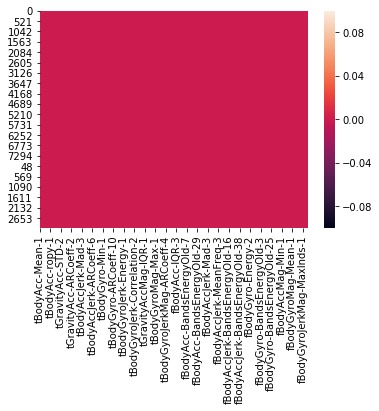

In [8]:
sns.heatmap(df.isna())

On remarque ainsi que le dataset ne contient pas de NA

Nous pouvons ensuite regardé le nombre d'éléments en fonction des différentes activités

In [9]:
labels_count = labels.labels.value_counts()
labels_count

5     1979
6     1958
4     1801
1     1722
2     1544
3     1407
11     139
9      107
10      85
12      84
7       70
8       33
Name: labels, dtype: int64

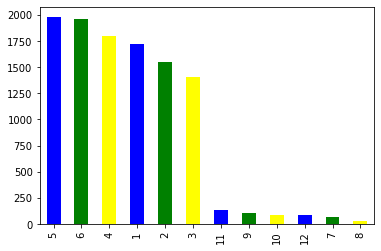

In [10]:
labels.labels.value_counts().plot(kind="bar", color=["blue","green","yellow"])

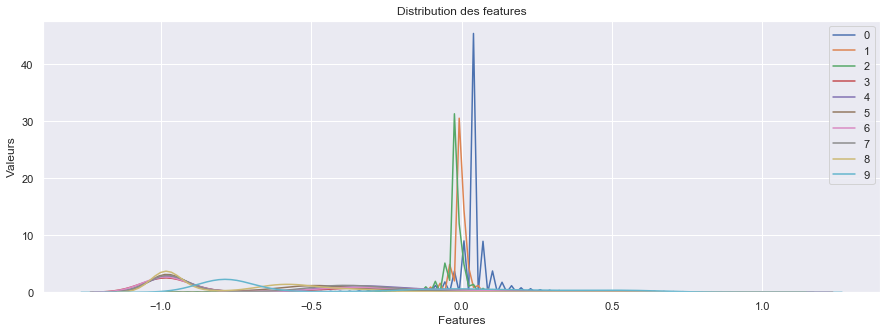

In [37]:
sns.set(rc={'figure.figsize':(15,5)})
for i in XTrain.columns[0:10]:
    fig = sns.kdeplot(XTrain[i])
plt.xlabel("Features")
plt.ylabel("Valeurs")
plt.title("Distribution des features")
plt.grid(True)
plt.show(fig)

#Pour des soucis de visibilité, je n'ai conservé que l'observation sur 10 features 

#### PCA

In [13]:
pca = PCA(n_components=2)
pc = pca.fit_transform(df)
pcDf = pd.DataFrame(data = pc,columns = ['pc1', 'pc2'])
#puis on merge notre dataset avec les 2 composantes de la PCA
finaldf= pcDf.merge(labels, how='inner',left_index=True,right_index=True)
finaldf.head()

,pc1,pc2,labels
0,-5.407597,-0.013310,5
0,-5.407597,-0.013310,5
1,-5.446587,-0.397406,5
1,-5.446587,-0.397406,5
2,-5.396125,-0.896960,5


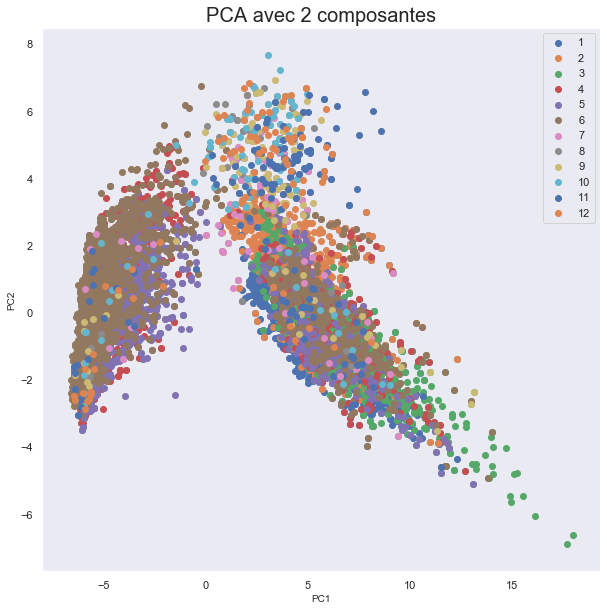

In [43]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 10)
ax.set_ylabel('PC2', fontsize = 10)
ax.set_title('PCA avec 2 composantes', fontsize = 20)
targets = [1,2,3,4,5,6,7,8,9,10,11,12]
for target in targets:
    indicesToKeep = finaldf['labels'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'pc1']
               , finaldf.loc[indicesToKeep, 'pc2'])
ax.legend(targets)
ax.grid()

In [16]:
# t-SNE
#tsne = TSNE(n_components=2,random_state=3)
#tsn = tsne.fit_transform(df)
#tsn.shape()

### Normalisation des données

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
df = scaler.transform(df)

### Modèles


On sépare les jeux de train et de test pour appliquer nos modèles.

In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(df,labels,test_size=0.25)

In [19]:
[element.shape for element in train_test_split(df,labels)]

[(8196, 561), (2733, 561), (8196, 1), (2733, 1)]

#### 1- Arbre de décision

In [20]:
arbre = DecisionTreeClassifier().fit(X_train, Y_train)

In [21]:
predictions_arbre= arbre.predict(X_test)

In [23]:
arbre_accurracy = accuracy_score(Y_test, predictions_arbre, normalize=True, sample_weight=None)#Evaluation du modele
arbre_accurracy

0.9066959385290889

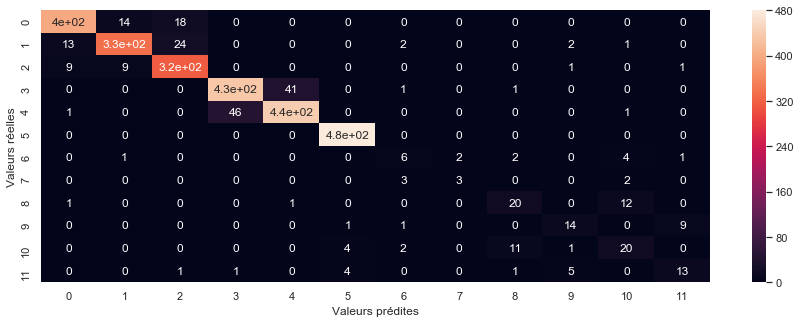

In [24]:
cm = confusion_matrix(Y_test, predictions_arbre, np.unique(labels))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);
ax.set_xlabel('Valeurs prédites');
ax.set_ylabel('Valeurs réelles'); 

Pour trouver les meilleurs paramètres pour notre arbre de décision, on utilise GridSearchCV

In [25]:
grid_values_arbre = {'criterion': ['gini', 'entropy'],'min_samples_split':[2,5,8,10],'max_features':['sqrt','log2',None]}
grid_arbre = GridSearchCV(DecisionTreeClassifier(), param_grid = grid_values_arbre,scoring = 'accuracy',cv=KFold(n_splits=5,shuffle=True), verbose=1)
grid_arbre.fit(X_train, Y_train)
grid_predictions_arbre = grid_arbre.predict(X_test)
grid_arbre_acc = accuracy_score(Y_test, grid_predictions_arbre, normalize=True, sample_weight=None)
grid_arbre_acc

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  3.3min finished


0.9286498353457738

In [26]:
grid_arbre.best_estimator_ 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

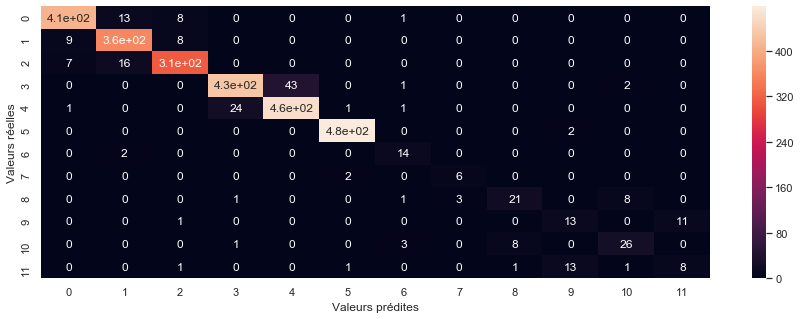

In [27]:
cm = confusion_matrix(Y_test, grid_predictions_arbre, np.unique(labels))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);
ax.set_xlabel('Valeurs prédites');
ax.set_ylabel('Valeurs réelles'); 

#### 2- Régression logistique


In [28]:
lr = LogisticRegression(max_iter=10000, random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, Y_train)
predictionsLR = lr.predict(X_test)
print(lr.score(X_test, Y_test))

//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9678009513355287


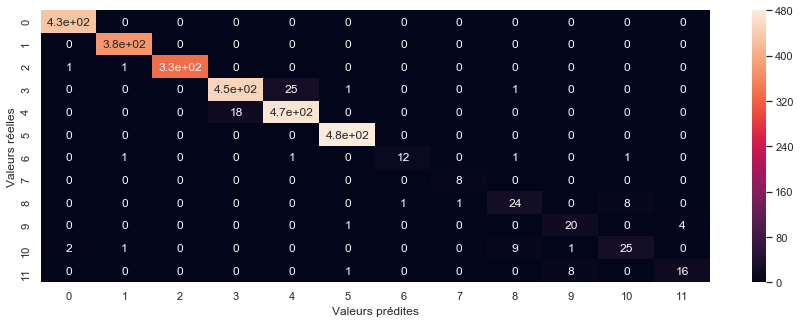

In [29]:
cm = confusion_matrix(Y_test, predictionsLR, np.unique(labels))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);
ax.set_xlabel('Valeurs prédites');
ax.set_ylabel('Valeurs réelles'); 

#### 3- Random forest


In [30]:
RF = RandomForestClassifier().fit(X_train, Y_train)
predictionsRF = RF.predict(X_test)
RF_acc = accuracy_score(Y_test, predictionsRF, normalize=True, sample_weight=None)
RF_acc

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


0.9436516648371752

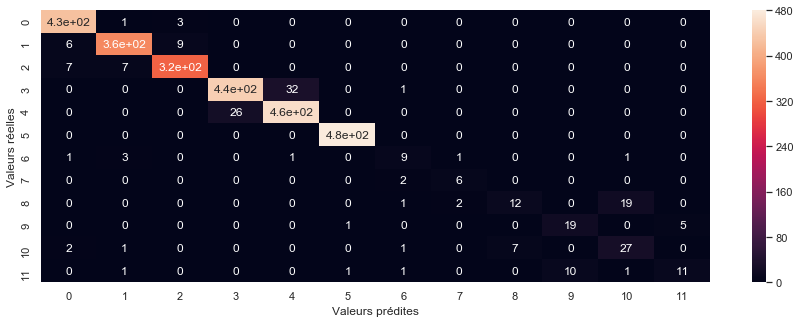

In [31]:
cm = confusion_matrix(Y_test, predictionsRF, np.unique(labels))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);
ax.set_xlabel('Valeurs prédites');
ax.set_ylabel('Valeurs réelles'); 

#### 4- XGBoost


In [32]:
XGB = XGBClassifier().fit(X_train, Y_train)
predictionsXGB = XGB.predict(X_test)
XGB_acc = accuracy_score(Y_test, predictionsXGB, normalize=True, sample_weight=None)
XGB_acc

//anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9751189169410904

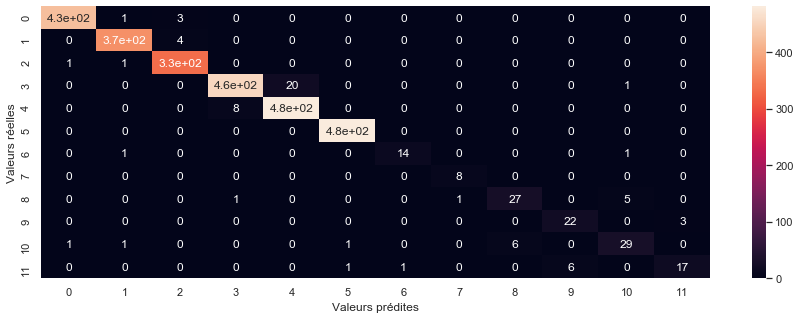

In [33]:
cm = confusion_matrix(Y_test, predictionsXGB, np.unique(labels))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);
ax.set_xlabel('Valeurs prédites');
ax.set_ylabel('Valeurs réelles'); 

### Comparaison des modèles

In [34]:
comparaison_modeles = []
noms = []
modeles = [('LogReg', LogisticRegression()), 
          ('XGBoost', XGBClassifier()), 
          ('DecTree', DecisionTreeClassifier()),
          ('RandomForest',RandomForestClassifier())]

In [36]:
for nom, modele in modeles:
    k_fold_validation = model_selection.KFold(n_splits=3)
    results = model_selection.cross_val_score(modele, X_train, Y_train, cv=k_fold_validation, scoring='accuracy')
    comparaison_modeles.append(results)
    noms.append(nom)
    output_message = "%s| Mean=%f STD=%f" % (nom, results.mean(), results.std())
    print(output_message)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning

LogReg| Mean=0.971938 STD=0.003854


//anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBoost| Mean=0.970473 STD=0.004355
DecTree| Mean=0.895193 STD=0.005657


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

RandomForest| Mean=0.938507 STD=0.000897


La régression logistique et le XGBoost obtiennent les meilleurs performances avec respectivement 0.971938 et 0.970473 d'accuracy.